# NFL Concussions from 2012 to 2014
Create graphs that shows head injuries and concussions related to teams, team positions and year

# Clean the dataset

In [22]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import scipy.stats as stats


In [2]:
# Read the csv file
clean_df = pd.read_csv("clean_concussion_2012_2014.csv")
clean_df

,Player,Team,Game,Date,Opposing Team,Position,Team Type,Pre-Season Injury?,Winning Team?,Week of Injury,Season,Weeks Injured,Games Missed,Unknown Injury?,Reported Injury Type,Total Snaps,Play Time After Injury,Average Playtime Before Injury
0,Aldrick Robinson,Washington Redskins,Washington Redskins vs. Tampa Bay Buccaneers (...,30/09/2012,Tampa Bay Buccaneers,Wide Receiver,offense,No,Yes,4,2012,1,1.0,No,Head,0,14 downs,37.00 downs
1,D.J. Fluker,San Diego Chargers,Tennessee Titans vs. San Diego Chargers (22/9/...,22/09/2013,Tennessee Titans,Offensive Tackle,offense,No,No,3,2013,1,1.0,No,Concussion,0,78 downs,73.50 downs
2,Marquise Goodwin,Buffalo Bills,Houston Texans vs. Buffalo Bills (28/9/2014),28/09/2014,Houston Texans,Wide Receiver,offense,No,No,4,2014,1,1.0,No,Concussion,0,25 downs,17.50 downs
3,Bryan Stork,New England Patriots,New England Patriots vs. Buffalo Bills (12/10/...,12/10/2014,Buffalo Bills,Center,offense,No,Yes,6,2014,1,1.0,No,Head,0,82 downs,41.50 downs
4,Daniel Kilgore,San Francisco 49ers,San Francisco 49ers vs. Arizona Cardinals (29/...,29/10/2012,Arizona Cardinals,Guard,offense,No,Yes,8,2012,1,0.0,No,Concussion,1,8 downs,14.43 downs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,Eric Weddle,San Diego Chargers,Baltimore Ravens vs. San Diego Chargers (25/11...,25/11/2012,Baltimore Ravens,Safety,defense,No,No,12,2012,1,0.0,No,Concussion,85,90 downs,76.00 downs
321,Blidi Wreh-Wilson,Tennessee Titans,Indianapolis Colts vs. Tennessee Titans (28/9/...,28/09/2014,Indianapolis Colts,Cornerback,defense,No,No,4,2014,1,1.0,No,Concussion,85,90 downs,78.00 downs
322,Josh Sitton,Green Bay Packers,Green Bay Packers vs. Tennessee Titans (23/12/...,23/12/2012,Tennessee Titans,Guard,offense,No,Yes,16,2012,1,0.0,No,Concussion,87,70 downs,73.64 downs
323,Nate Solder,New England Patriots,New England Patriots vs. Cleveland Browns (8/1...,8/12/2013,Cleveland Browns,Offensive Tackle,offense,No,Yes,14,2013,1,0.0,No,Concussion,87,52 downs,78.83 downs


In [3]:
# List number of players per positions on offense and defense
clean_df["Position"].value_counts()

Cornerback          52
Wide Receiver       45
Safety              41
Tight End           35
Running Back        33
Linebacker          25
Guard               24
Defensive End       18
Offensive Tackle    17
Defensive Tackle    13
Quarterback         12
Center               7
Full Back            3
Name: Position, dtype: int64

In [279]:
# comerback is mispelled.  Correct the mispelling
#clean_df = clean_df.replace(to_replace="Comerback", value="Cornerback")
#clean_df["Position"].value_counts()

In [280]:
# Change the season column values 
#clean_df = clean_df.replace(to_replace="2012/2013", value="2012")
#clean_df = clean_df.replace(to_replace="2013/2014", value="2013")
#clean_df = clean_df.replace(to_replace="2014/2015", value="2014")

In [282]:
#clean_df

In [167]:
# Drop the unwanted column
# clean_df = clean_df.drop(["Unnamed: 0"], axis=1)

In [283]:
#clean_df

In [169]:
# Add another column that will show the team classification of a position (offense or defense)
#clean_df["Team Type"] = ""

In [284]:
#clean_df

In [285]:
# list the columns
#list(clean_df.columns)

In [288]:
# Rearrange the columns to have "Team Type" next to "Position"
#clean_df = clean_df[["Player", 
#                     "Team", 
#                     "Game", 
#                     "Date", 
#                     "Opposing Team", 
#                     "Position", 
#                     "Team Type",
#                     "Pre-Season Injury?",
#                     "Winning Team?",
#                     "Week of Injury",
#                     "Season",
#                     "Weeks Injured",
#                     "Games Missed",
#                     "Unknown Injury?",
#                     "Reported Injury Type",
#                     "Total Snaps",
#                     "Play Time After Injury",
#                     "Average Playtime Before Injury",                  
#                    ]]

In [4]:
clean_df.head()

,Player,Team,Game,Date,Opposing Team,Position,Team Type,Pre-Season Injury?,Winning Team?,Week of Injury,Season,Weeks Injured,Games Missed,Unknown Injury?,Reported Injury Type,Total Snaps,Play Time After Injury,Average Playtime Before Injury
0,Aldrick Robinson,Washington Redskins,Washington Redskins vs. Tampa Bay Buccaneers (...,30/09/2012,Tampa Bay Buccaneers,Wide Receiver,offense,No,Yes,4,2012,1,1.0,No,Head,0,14 downs,37.00 downs
1,D.J. Fluker,San Diego Chargers,Tennessee Titans vs. San Diego Chargers (22/9/...,22/09/2013,Tennessee Titans,Offensive Tackle,offense,No,No,3,2013,1,1.0,No,Concussion,0,78 downs,73.50 downs
2,Marquise Goodwin,Buffalo Bills,Houston Texans vs. Buffalo Bills (28/9/2014),28/09/2014,Houston Texans,Wide Receiver,offense,No,No,4,2014,1,1.0,No,Concussion,0,25 downs,17.50 downs
3,Bryan Stork,New England Patriots,New England Patriots vs. Buffalo Bills (12/10/...,12/10/2014,Buffalo Bills,Center,offense,No,Yes,6,2014,1,1.0,No,Head,0,82 downs,41.50 downs
4,Daniel Kilgore,San Francisco 49ers,San Francisco 49ers vs. Arizona Cardinals (29/...,29/10/2012,Arizona Cardinals,Guard,offense,No,Yes,8,2012,1,0.0,No,Concussion,1,8 downs,14.43 downs


In [290]:
# To know the "Team Type" (offense or defense), I have to list the unique values on "Position"
#list(clean_df["Position"].unique())

In [175]:
# Indicate whether the team position is offense or defense. 
#clean_df.loc[clean_df["Position"] == "Wide Receiver", "Team Type"] = "offense"
#clean_df.loc[clean_df["Position"] == "Offensive Tackle", "Team Type"] = "offense"
#clean_df.loc[clean_df["Position"] == "Center", "Team Type"] = "offense"
#clean_df.loc[clean_df["Position"] == "Guard", "Team Type"] = "offense"
#clean_df.loc[clean_df["Position"] == "Tight End", "Team Type"] = "offense"
#clean_df.loc[clean_df["Position"] == "Defensive End", "Team Type"] = "defense"
#clean_df.loc[clean_df["Position"] == "Running Back", "Team Type"] = "offense"
#clean_df.loc[clean_df["Position"] == "Safety", "Team Type"] = "defense"
#clean_df.loc[clean_df["Position"] == "Cornerback", "Team Type"] = "defense"
#clean_df.loc[clean_df["Position"] == "Linebacker", "Team Type"] = "defense"
#clean_df.loc[clean_df["Position"] == "Defensive Tackle", "Team Type"] = "defense"
#clean_df.loc[clean_df["Position"] == "Quarterback", "Team Type"] = "offense"
#clean_df.loc[clean_df["Position"] == "Full Back", "Team Type"] = "offense"

In [291]:
#clean_df

In [292]:
# Save the dataframe to a file
#clean_df.to_csv("clean_concussion_2012_2014.csv", index=False)

# Create a graph that show injuries of offensive positions

In [5]:
# Create a dataframe with offensive positions only
offense_df = clean_df.loc[clean_df["Team Type"] == "offense"]
offense_df.head()

,Player,Team,Game,Date,Opposing Team,Position,Team Type,Pre-Season Injury?,Winning Team?,Week of Injury,Season,Weeks Injured,Games Missed,Unknown Injury?,Reported Injury Type,Total Snaps,Play Time After Injury,Average Playtime Before Injury
0,Aldrick Robinson,Washington Redskins,Washington Redskins vs. Tampa Bay Buccaneers (...,30/09/2012,Tampa Bay Buccaneers,Wide Receiver,offense,No,Yes,4,2012,1,1.0,No,Head,0,14 downs,37.00 downs
1,D.J. Fluker,San Diego Chargers,Tennessee Titans vs. San Diego Chargers (22/9/...,22/09/2013,Tennessee Titans,Offensive Tackle,offense,No,No,3,2013,1,1.0,No,Concussion,0,78 downs,73.50 downs
2,Marquise Goodwin,Buffalo Bills,Houston Texans vs. Buffalo Bills (28/9/2014),28/09/2014,Houston Texans,Wide Receiver,offense,No,No,4,2014,1,1.0,No,Concussion,0,25 downs,17.50 downs
3,Bryan Stork,New England Patriots,New England Patriots vs. Buffalo Bills (12/10/...,12/10/2014,Buffalo Bills,Center,offense,No,Yes,6,2014,1,1.0,No,Head,0,82 downs,41.50 downs
4,Daniel Kilgore,San Francisco 49ers,San Francisco 49ers vs. Arizona Cardinals (29/...,29/10/2012,Arizona Cardinals,Guard,offense,No,Yes,8,2012,1,0.0,No,Concussion,1,8 downs,14.43 downs


In [6]:
# Determine the number of head injuries and concussions per position on offense
offense_injuries= offense_df.groupby(["Position"]).apply(lambda x: x[x["Team Type"] == "offense"]["Weeks Injured"].count())
offense_injuries

Position
Center               7
Full Back            3
Guard               24
Offensive Tackle    17
Quarterback         12
Running Back        33
Tight End           35
Wide Receiver       45
dtype: int64

In [7]:
# Put it in a dataframe
offense_injuries_df = pd.DataFrame(offense_injuries)
offense_injuries_df = offense_injuries_df.reset_index()
offense_injuries_df = offense_injuries_df.rename(columns = {"Position":"Offensive Position", 0:"Number of Offensive Injuries"})
offense_injuries_df

,Offensive Position,Number of Offensive Injuries
0,Center,7
1,Full Back,3
2,Guard,24
3,Offensive Tackle,17
4,Quarterback,12
5,Running Back,33
6,Tight End,35
7,Wide Receiver,45


In [8]:
# Get your x-axis and y-axis values for the bar graph
offensive_positions = offense_injuries_df["Offensive Position"]
number_of_offensive_injuries = offense_injuries_df["Number of Offensive Injuries"]
offensive_positions, number_of_offensive_injuries

(0              Center
 1           Full Back
 2               Guard
 3    Offensive Tackle
 4         Quarterback
 5        Running Back
 6           Tight End
 7       Wide Receiver
 Name: Offensive Position, dtype: object,
 0     7
 1     3
 2    24
 3    17
 4    12
 5    33
 6    35
 7    45
 Name: Number of Offensive Injuries, dtype: int64)

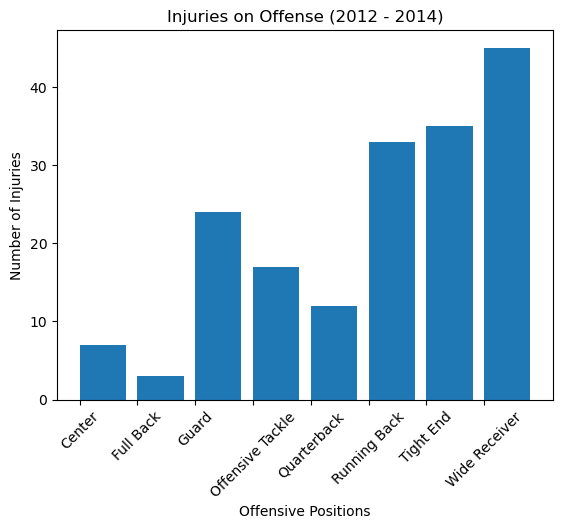

In [9]:
# Plot the bar graph
plt.bar(offensive_positions, number_of_offensive_injuries, align="edge")


# Label the graph
plt.xticks(rotation=45)
plt.title("Injuries on Offense (2012 - 2014)")
plt.xlabel("Offensive Positions")
plt.ylabel("Number of Injuries")

# Save the plot to a file
plt.savefig("Images/Injuries_on_offense_2012-2014.png", bbox_inches="tight")

# Show the graph
plt.show()

In [10]:
# NOTE: This is another example of a bar graph using pandas plot.  We can delete this later when finalizing our code.
# Create the bar graph
# bar_offense_injuries_df = offense_injuries_df.set_index("Offensive Position")
# bar_offense_injuries_df.plot(kind="bar", xlabel="Offensive Positions", ylabel="Number of Offensive Injuries", rot=45, position=0)

# Create a graph that show injuries of defensive positions

In [11]:
# Create a dataframe with defensive positions only
defense_df = clean_df.loc[clean_df["Team Type"] == "defense"]
defense_df.head()

,Player,Team,Game,Date,Opposing Team,Position,Team Type,Pre-Season Injury?,Winning Team?,Week of Injury,Season,Weeks Injured,Games Missed,Unknown Injury?,Reported Injury Type,Total Snaps,Play Time After Injury,Average Playtime Before Injury
6,Shea McClellin,Chicago Bears,Houston Texans vs. Chicago Bears (11/11/2012),11/11/2012,Houston Texans,Defensive End,defense,No,No,10,2012,1,1.0,No,Concussion,1,27 downs,31.00 downs
13,Dwight Lowery,Jacksonville Jaguars,Seattle Seahawks vs. Jacksonville Jaguars (22/...,22/09/2013,Seattle Seahawks,Safety,defense,No,No,3,2013,1,13.0,No,Concussion,2,Did not return from injury,62.50 downs
18,William Middleton,Jacksonville Jaguars,Houston Texans vs. Jacksonville Jaguars (18/11...,18/11/2012,Houston Texans,Cornerback,defense,No,No,11,2012,1,6.0,No,Concussion,3,Did not return from injury,28.67 downs
21,K.J. Wright,Seattle Seahawks,Seattle Seahawks vs. Minnesota Vikings (4/11/2...,4/11/2012,Minnesota Vikings,Linebacker,defense,No,Yes,9,2012,1,1.0,No,Concussion,4,71 downs,73.75 downs
22,Reggie Walker,Arizona Cardinals,St. Louis Rams vs. Arizona Cardinals (4/10/2012),4/10/2012,St. Louis Rams,Linebacker,defense,No,No,5,2012,1,2.0,No,Head,4,20 downs,28.75 downs


In [12]:
# Determine the number of head injuries and concussions per position on defense
defense_injuries= defense_df.groupby(["Position"]).apply(lambda x: x[x["Team Type"] == "defense"]["Weeks Injured"].count())
defense_injuries

Position
Cornerback          52
Defensive End       18
Defensive Tackle    13
Linebacker          25
Safety              41
dtype: int64

In [13]:
# Put it in a dataframe
defense_injuries_df = pd.DataFrame(defense_injuries)
defense_injuries_df = defense_injuries_df.reset_index()
defense_injuries_df = defense_injuries_df.rename(columns = {"Position":"Defensive Position", 0:"Number of Defensive Injuries"})
defense_injuries_df

,Defensive Position,Number of Defensive Injuries
0,Cornerback,52
1,Defensive End,18
2,Defensive Tackle,13
3,Linebacker,25
4,Safety,41


In [14]:
# Get your x-axis and y-axis values for the bar graph
defensive_positions = defense_injuries_df["Defensive Position"]
number_of_defensive_injuries = defense_injuries_df["Number of Defensive Injuries"]
defensive_positions, number_of_defensive_injuries

(0          Cornerback
 1       Defensive End
 2    Defensive Tackle
 3          Linebacker
 4              Safety
 Name: Defensive Position, dtype: object,
 0    52
 1    18
 2    13
 3    25
 4    41
 Name: Number of Defensive Injuries, dtype: int64)

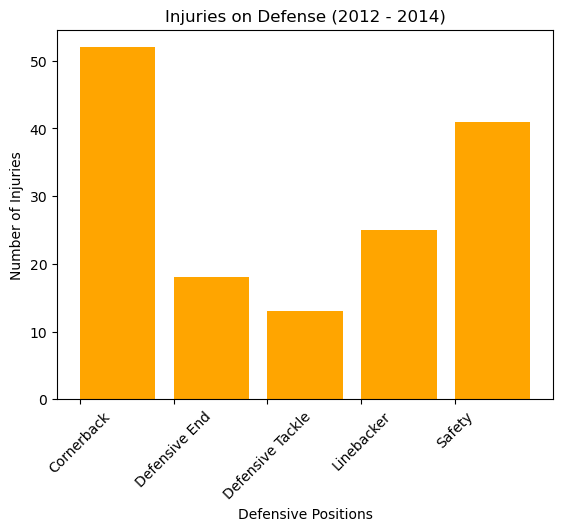

In [15]:
# Plot the bar graph
plt.bar(defensive_positions, number_of_defensive_injuries, color="orange", align="edge")


# Label the graph
plt.xticks(rotation=45)
plt.title("Injuries on Defense (2012 - 2014)")
plt.xlabel("Defensive Positions")
plt.ylabel("Number of Injuries")

# Save the plot to a file
plt.savefig("Images/Injuries_on_defense_2012-2014.png", bbox_inches="tight")

# Show the graph
plt.show()

In [15]:
# NOTE: This is another example of a bar graph using pandas plot.  We can delete this later when finalizing our code.
# Create the bar graph
# bar_defense_injuries_df = defense_injuries_df.set_index("Defensive Position")
# bar_defense_injuries_df.plot(kind="bar", xlabel="Defensive Positions", ylabel="Number of Defensive Injuries", rot=45, position=0)

# Create a graph that shows injuries for both offensive and defensive teams

In [16]:
# Combined both bar graphs
offense_injuries_df = offense_injuries_df.rename(columns={"Offensive Position":"Position"})
defense_injuries_df = defense_injuries_df.rename(columns={"Defensive Position":"Position"})

In [17]:
bar_injuries_df = pd.merge(offense_injuries_df, defense_injuries_df, how="outer", on="Position")
bar_injuries_df

,Position,Number of Offensive Injuries,Number of Defensive Injuries
0,Center,7.0,NaN
1,Full Back,3.0,NaN
2,Guard,24.0,NaN
3,Offensive Tackle,17.0,NaN
4,Quarterback,12.0,NaN
5,Running Back,33.0,NaN
6,Tight End,35.0,NaN
7,Wide Receiver,45.0,NaN
8,Cornerback,NaN,52.0
9,Defensive End,NaN,18.0


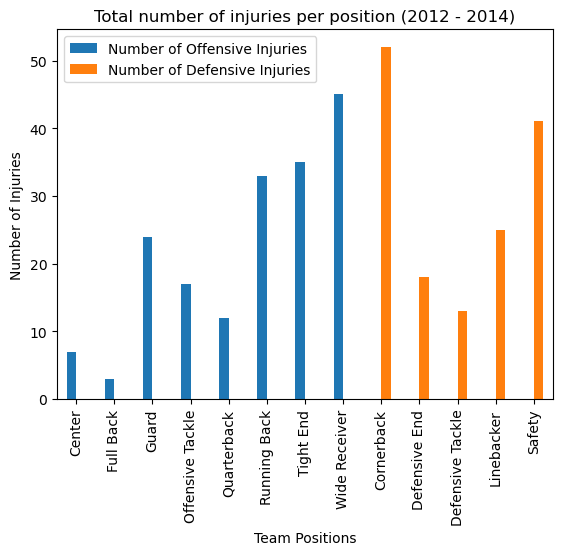

In [18]:
# Create the bar graph
bar_injuries_df = bar_injuries_df.set_index("Position")
bar_injuries_df.plot(kind="bar", 
                     xlabel="Team Positions", 
                     ylabel="Number of Injuries", 
                     title="Total number of injuries per position (2012 - 2014)", 
                     position=0.5)

# Save the plot to a file
plt.savefig("Images/Total_injuries_on_2012-2014.png", bbox_inches="tight")

# Show the plot
plt.show()

# Create a pie graph that shows the percentage of injuries between offensive and defensive teams

In [19]:
# Recall the clean dataframe
clean_df

,Player,Team,Game,Date,Opposing Team,Position,Team Type,Pre-Season Injury?,Winning Team?,Week of Injury,Season,Weeks Injured,Games Missed,Unknown Injury?,Reported Injury Type,Total Snaps,Play Time After Injury,Average Playtime Before Injury
0,Aldrick Robinson,Washington Redskins,Washington Redskins vs. Tampa Bay Buccaneers (...,30/09/2012,Tampa Bay Buccaneers,Wide Receiver,offense,No,Yes,4,2012,1,1.0,No,Head,0,14 downs,37.00 downs
1,D.J. Fluker,San Diego Chargers,Tennessee Titans vs. San Diego Chargers (22/9/...,22/09/2013,Tennessee Titans,Offensive Tackle,offense,No,No,3,2013,1,1.0,No,Concussion,0,78 downs,73.50 downs
2,Marquise Goodwin,Buffalo Bills,Houston Texans vs. Buffalo Bills (28/9/2014),28/09/2014,Houston Texans,Wide Receiver,offense,No,No,4,2014,1,1.0,No,Concussion,0,25 downs,17.50 downs
3,Bryan Stork,New England Patriots,New England Patriots vs. Buffalo Bills (12/10/...,12/10/2014,Buffalo Bills,Center,offense,No,Yes,6,2014,1,1.0,No,Head,0,82 downs,41.50 downs
4,Daniel Kilgore,San Francisco 49ers,San Francisco 49ers vs. Arizona Cardinals (29/...,29/10/2012,Arizona Cardinals,Guard,offense,No,Yes,8,2012,1,0.0,No,Concussion,1,8 downs,14.43 downs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,Eric Weddle,San Diego Chargers,Baltimore Ravens vs. San Diego Chargers (25/11...,25/11/2012,Baltimore Ravens,Safety,defense,No,No,12,2012,1,0.0,No,Concussion,85,90 downs,76.00 downs
321,Blidi Wreh-Wilson,Tennessee Titans,Indianapolis Colts vs. Tennessee Titans (28/9/...,28/09/2014,Indianapolis Colts,Cornerback,defense,No,No,4,2014,1,1.0,No,Concussion,85,90 downs,78.00 downs
322,Josh Sitton,Green Bay Packers,Green Bay Packers vs. Tennessee Titans (23/12/...,23/12/2012,Tennessee Titans,Guard,offense,No,Yes,16,2012,1,0.0,No,Concussion,87,70 downs,73.64 downs
323,Nate Solder,New England Patriots,New England Patriots vs. Cleveland Browns (8/1...,8/12/2013,Cleveland Browns,Offensive Tackle,offense,No,Yes,14,2013,1,0.0,No,Concussion,87,52 downs,78.83 downs


In [20]:
# Create the dataframe that shows the total number of injuries per team type
number_injuries_df = pd.DataFrame(clean_df["Team Type"].value_counts())
number_injuries_df = number_injuries_df.rename(columns={"Team Type":"Number of Injuries"})
number_injuries_df

,Number of Injuries
offense,176
defense,149


In [23]:
stats.ttest_ind(defense_df["Games Missed"], offense_df["Games Missed"], equal_var=False)
#Not statistically significant difference in number of games missed

Ttest_indResult(statistic=-1.7650938173235642, pvalue=0.07849418146862482)

In [24]:
# Determine the total number of injuries
total_number_of_injuries = len(clean_df["Player"])
total_number_of_injuries

325

In [25]:
# Get the percentage of offensive and defensive injuries
percent_offense_injury = round((number_injuries_df.iloc[0]/total_number_of_injuries)*100)
percent_defense_injury = round((number_injuries_df.iloc[1]/total_number_of_injuries)*100)
percent_offense_injury, percent_defense_injury

(Number of Injuries    54.0
 Name: offense, dtype: float64,
 Number of Injuries    46.0
 Name: defense, dtype: float64)

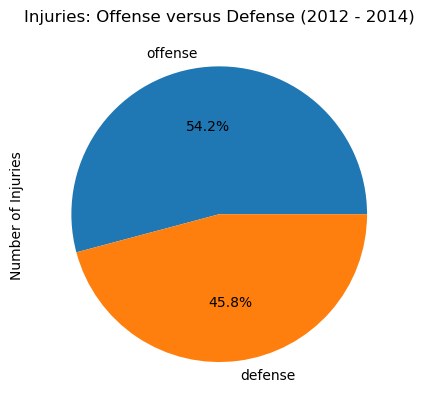

In [26]:
# Create the pie graph that will show the percentage of injury on offense and defense
labels = number_injuries_df.index
plt.pie(number_injuries_df["Number of Injuries"], labels=labels, autopct="%1.1f%%")
plt.ylabel("Number of Injuries")
plt.title("Injuries: Offense versus Defense (2012 - 2014)")

# Save the plot to a file
plt.savefig("Images/Percentage_of_injuries_between_offense_defense_2012-2014.png", bbox_inches="tight")

# Show the plot
plt.show()

# Create a graph that shows the number of injuries per team

In [27]:
# Recall the clean dataframe
clean_df

,Player,Team,Game,Date,Opposing Team,Position,Team Type,Pre-Season Injury?,Winning Team?,Week of Injury,Season,Weeks Injured,Games Missed,Unknown Injury?,Reported Injury Type,Total Snaps,Play Time After Injury,Average Playtime Before Injury
0,Aldrick Robinson,Washington Redskins,Washington Redskins vs. Tampa Bay Buccaneers (...,30/09/2012,Tampa Bay Buccaneers,Wide Receiver,offense,No,Yes,4,2012,1,1.0,No,Head,0,14 downs,37.00 downs
1,D.J. Fluker,San Diego Chargers,Tennessee Titans vs. San Diego Chargers (22/9/...,22/09/2013,Tennessee Titans,Offensive Tackle,offense,No,No,3,2013,1,1.0,No,Concussion,0,78 downs,73.50 downs
2,Marquise Goodwin,Buffalo Bills,Houston Texans vs. Buffalo Bills (28/9/2014),28/09/2014,Houston Texans,Wide Receiver,offense,No,No,4,2014,1,1.0,No,Concussion,0,25 downs,17.50 downs
3,Bryan Stork,New England Patriots,New England Patriots vs. Buffalo Bills (12/10/...,12/10/2014,Buffalo Bills,Center,offense,No,Yes,6,2014,1,1.0,No,Head,0,82 downs,41.50 downs
4,Daniel Kilgore,San Francisco 49ers,San Francisco 49ers vs. Arizona Cardinals (29/...,29/10/2012,Arizona Cardinals,Guard,offense,No,Yes,8,2012,1,0.0,No,Concussion,1,8 downs,14.43 downs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,Eric Weddle,San Diego Chargers,Baltimore Ravens vs. San Diego Chargers (25/11...,25/11/2012,Baltimore Ravens,Safety,defense,No,No,12,2012,1,0.0,No,Concussion,85,90 downs,76.00 downs
321,Blidi Wreh-Wilson,Tennessee Titans,Indianapolis Colts vs. Tennessee Titans (28/9/...,28/09/2014,Indianapolis Colts,Cornerback,defense,No,No,4,2014,1,1.0,No,Concussion,85,90 downs,78.00 downs
322,Josh Sitton,Green Bay Packers,Green Bay Packers vs. Tennessee Titans (23/12/...,23/12/2012,Tennessee Titans,Guard,offense,No,Yes,16,2012,1,0.0,No,Concussion,87,70 downs,73.64 downs
323,Nate Solder,New England Patriots,New England Patriots vs. Cleveland Browns (8/1...,8/12/2013,Cleveland Browns,Offensive Tackle,offense,No,Yes,14,2013,1,0.0,No,Concussion,87,52 downs,78.83 downs


In [28]:
# Count the number of injuries per team and put it in a dataframe
team_injury_df = pd.DataFrame(clean_df.groupby("Team")["Reported Injury Type"].count())
team_injury_df = team_injury_df.rename(columns={"Reported Injury Type":"Number of Injuries"})
team_injury_df

,Number of Injuries
Team,
Arizona Cardinals,8
Atlanta Falcons,5
Baltimore Ravens,11
Buffalo Bills,5
Carolina Panthers,6
Chicago Bears,7
Cincinnati Bengals,12
Cleveland Browns,18
Dallas Cowboys,9


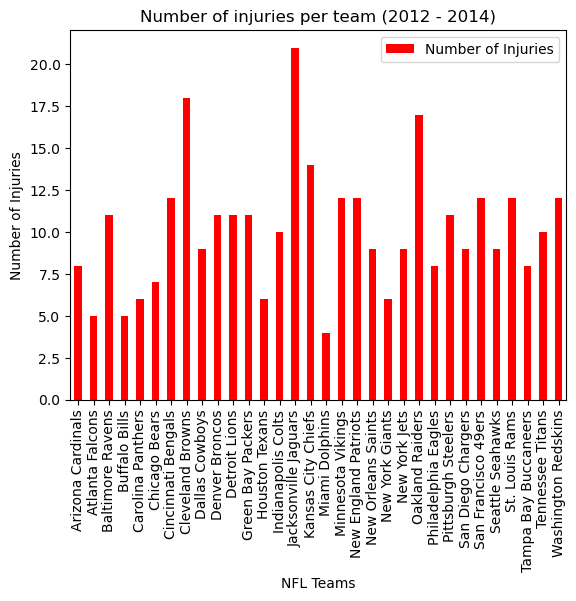

In [29]:
# Create the bar graph that shows the number of injuries per team
team_injury_df.plot(kind="bar", 
                    xlabel="NFL Teams", 
                    ylabel="Number of Injuries", 
                    title="Number of injuries per team (2012 - 2014)", 
                    position=0.5, 
                    color="red")

# Save the plot to a file
plt.savefig("Images/Injuries_per_team_2012-2014.png", bbox_inches="tight")

# Show the plot
plt.show()

In [40]:
group1=team_injury_df[team_injury_df.index == "Arizona Cardinals"]["Number of Injuries"]
group2=team_injury_df[team_injury_df.index == "Atlanta Falcons"]["Number of Injuries"]
group3=team_injury_df[team_injury_df.index == "Baltimore Ravens"]["Number of Injuries"]
group4=team_injury_df[team_injury_df.index == "Buffalo Bills"]["Number of Injuries"]

In [41]:
stats.f_oneway(group1, group2, group3, group4)

F_onewayResult(statistic=nan, pvalue=nan)

In [37]:
stats.f_oneway(team_injury_df[team_injury_df.index== "Arizona Cardinals"]["Number of Injuries"], team_injury_df[team_injury_df.index == "Baltimore Ravens"]["Number of Injuries"], team_injury_df[team_injury_df.index == "Atlanta Falcons"]["Number of Injuries"])


F_onewayResult(statistic=nan, pvalue=nan)

# Create a graph that show injuries of offensive positions per year

In [43]:
# Recall the dataframe for offense
offense_df.head()

,Player,Team,Game,Date,Opposing Team,Position,Team Type,Pre-Season Injury?,Winning Team?,Week of Injury,Season,Weeks Injured,Games Missed,Unknown Injury?,Reported Injury Type,Total Snaps,Play Time After Injury,Average Playtime Before Injury
0,Aldrick Robinson,Washington Redskins,Washington Redskins vs. Tampa Bay Buccaneers (...,30/09/2012,Tampa Bay Buccaneers,Wide Receiver,offense,No,Yes,4,2012,1,1.0,No,Head,0,14 downs,37.00 downs
1,D.J. Fluker,San Diego Chargers,Tennessee Titans vs. San Diego Chargers (22/9/...,22/09/2013,Tennessee Titans,Offensive Tackle,offense,No,No,3,2013,1,1.0,No,Concussion,0,78 downs,73.50 downs
2,Marquise Goodwin,Buffalo Bills,Houston Texans vs. Buffalo Bills (28/9/2014),28/09/2014,Houston Texans,Wide Receiver,offense,No,No,4,2014,1,1.0,No,Concussion,0,25 downs,17.50 downs
3,Bryan Stork,New England Patriots,New England Patriots vs. Buffalo Bills (12/10/...,12/10/2014,Buffalo Bills,Center,offense,No,Yes,6,2014,1,1.0,No,Head,0,82 downs,41.50 downs
4,Daniel Kilgore,San Francisco 49ers,San Francisco 49ers vs. Arizona Cardinals (29/...,29/10/2012,Arizona Cardinals,Guard,offense,No,Yes,8,2012,1,0.0,No,Concussion,1,8 downs,14.43 downs


In [44]:
# Create a dataframe showing the injuries per year and reset the index
injury_offense_per_year_df = pd.DataFrame(offense_df.groupby("Season")["Reported Injury Type"].count())
injury_offense_per_year_df = injury_offense_per_year_df.rename(columns={"Reported Injury Type":"Number of Injuries"})
injury_offense_per_year_df = injury_offense_per_year_df.reset_index()
injury_offense_per_year_df

,Season,Number of Injuries
0,2012,87
1,2013,73
2,2014,16


In [45]:
# Create the list for x-axis and y-axis
offense_seasons = injury_offense_per_year_df["Season"]
injury_number = injury_offense_per_year_df["Number of Injuries"]
offense_seasons, injury_number

(0    2012
 1    2013
 2    2014
 Name: Season, dtype: int64,
 0    87
 1    73
 2    16
 Name: Number of Injuries, dtype: int64)

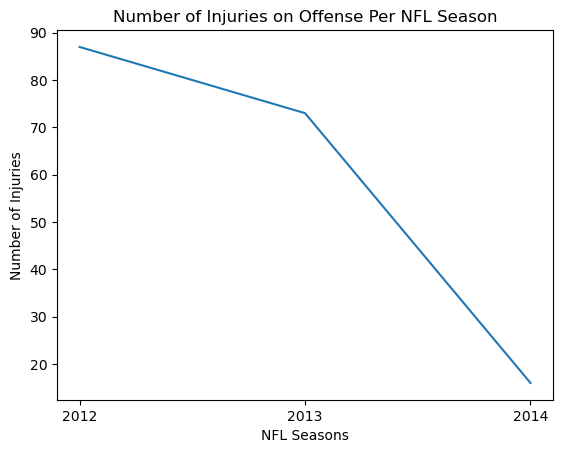

In [46]:
# Create the line plot
plt.xlabel("NFL Seasons")
plt.ylabel("Number of Injuries")
plt.title("Number of Injuries on Offense Per NFL Season")
plt.xticks(offense_seasons)
plt.plot(offense_seasons, injury_number)

# Save the plot
plt.savefig("Images/Injuries_on_offense_per_year.png", bbox_inches="tight")

# Show the plot
plt.show()

# Create a graph that show injuries of defensive positions per year

In [47]:
# Recall the dataframe for defense
defense_df.head()

,Player,Team,Game,Date,Opposing Team,Position,Team Type,Pre-Season Injury?,Winning Team?,Week of Injury,Season,Weeks Injured,Games Missed,Unknown Injury?,Reported Injury Type,Total Snaps,Play Time After Injury,Average Playtime Before Injury
6,Shea McClellin,Chicago Bears,Houston Texans vs. Chicago Bears (11/11/2012),11/11/2012,Houston Texans,Defensive End,defense,No,No,10,2012,1,1.0,No,Concussion,1,27 downs,31.00 downs
13,Dwight Lowery,Jacksonville Jaguars,Seattle Seahawks vs. Jacksonville Jaguars (22/...,22/09/2013,Seattle Seahawks,Safety,defense,No,No,3,2013,1,13.0,No,Concussion,2,Did not return from injury,62.50 downs
18,William Middleton,Jacksonville Jaguars,Houston Texans vs. Jacksonville Jaguars (18/11...,18/11/2012,Houston Texans,Cornerback,defense,No,No,11,2012,1,6.0,No,Concussion,3,Did not return from injury,28.67 downs
21,K.J. Wright,Seattle Seahawks,Seattle Seahawks vs. Minnesota Vikings (4/11/2...,4/11/2012,Minnesota Vikings,Linebacker,defense,No,Yes,9,2012,1,1.0,No,Concussion,4,71 downs,73.75 downs
22,Reggie Walker,Arizona Cardinals,St. Louis Rams vs. Arizona Cardinals (4/10/2012),4/10/2012,St. Louis Rams,Linebacker,defense,No,No,5,2012,1,2.0,No,Head,4,20 downs,28.75 downs


In [48]:
# Create a dataframe showing the injuries per year and reset the index
injury_defense_per_year_df = pd.DataFrame(defense_df.groupby("Season")["Reported Injury Type"].count())
injury_defense_per_year_df = injury_defense_per_year_df.rename(columns={"Reported Injury Type":"Number of Injuries"})
injury_defense_per_year_df = injury_defense_per_year_df.reset_index()
injury_defense_per_year_df

,Season,Number of Injuries
0,2012,62
1,2013,61
2,2014,26


In [49]:
# Create the list for x-axis and y-axis
defense_seasons = injury_defense_per_year_df["Season"]
injury_number = injury_defense_per_year_df["Number of Injuries"]
defense_seasons, injury_number

(0    2012
 1    2013
 2    2014
 Name: Season, dtype: int64,
 0    62
 1    61
 2    26
 Name: Number of Injuries, dtype: int64)

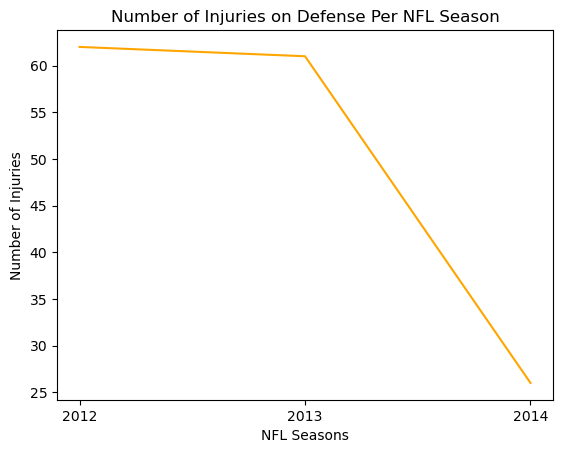

In [50]:
# Create the line plot
plt.xlabel("NFL Seasons")
plt.ylabel("Number of Injuries")
plt.title("Number of Injuries on Defense Per NFL Season")
plt.xticks(defense_seasons)
plt.plot(defense_seasons, injury_number, color="orange")

# Save the plot
plt.savefig("Images/Injuries_on_defense_per_year.png", bbox_inches="tight")

# Show the plot
plt.show()

# Create a graph that shows injuries for both offensive and defensive teams per year

In [51]:
# Rename the columns for number of injuries on injury_offense_per_year_df
injury_offense_per_year_df = injury_offense_per_year_df.rename(columns={"Number of Injuries":"Offensive Injuries"})
injury_offense_per_year_df


,Season,Offensive Injuries
0,2012,87
1,2013,73
2,2014,16


In [52]:
# Rename the columns for number of injuries on injury_defense_per_year_df
injury_defense_per_year_df = injury_defense_per_year_df.rename(columns={"Number of Injuries":"Defensive Injuries"})
injury_defense_per_year_df

,Season,Defensive Injuries
0,2012,62
1,2013,61
2,2014,26


In [53]:
# Merge the dataframe for offense and defense
injury_per_year_df = pd.merge(injury_offense_per_year_df, injury_defense_per_year_df, on="Season")
injury_per_year_df

,Season,Offensive Injuries,Defensive Injuries
0,2012,87,62
1,2013,73,61
2,2014,16,26


In [54]:
stats.ttest_ind(injury_per_year_df["Offensive Injuries"], injury_per_year_df["Defensive Injuries"], equal_var=False)
#not significantly significant number of injuries between offense and defense over the years

Ttest_indResult(statistic=0.3639356095616046, pvalue=0.7393726990881611)

In [55]:
# Create the x-axis and y-axis
seasons = injury_per_year_df["Season"]
offensive_injury_number = injury_per_year_df["Offensive Injuries"]
defensive_injury_number = injury_per_year_df["Defensive Injuries"]
seasons, offensive_injury_number, defensive_injury_number

(0    2012
 1    2013
 2    2014
 Name: Season, dtype: int64,
 0    87
 1    73
 2    16
 Name: Offensive Injuries, dtype: int64,
 0    62
 1    61
 2    26
 Name: Defensive Injuries, dtype: int64)

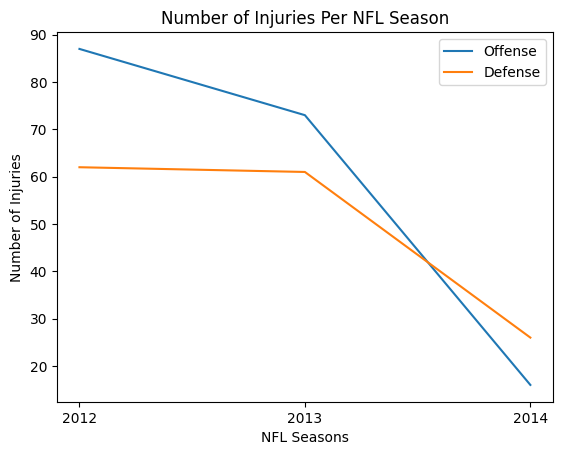

In [39]:
# Create the line plot
plt.xlabel("NFL Seasons")
plt.ylabel("Number of Injuries")
plt.title("Number of Injuries Per NFL Season")
plt.xticks(seasons)
plt.plot(seasons, offensive_injury_number, label="Offense")
plt.plot(seasons, defensive_injury_number, label="Defense")
plt.legend()

# Save the plot
plt.savefig("Images/Injuries_per_year.png", bbox_inches="tight")

# Show the plot
plt.show()

# Create a 3D bar graph that shows the NFL teams, seasons and number of injuries

In [40]:
# Recall the clean dataframs
clean_df

,Player,Team,Game,Date,Opposing Team,Position,Team Type,Pre-Season Injury?,Winning Team?,Week of Injury,Season,Weeks Injured,Games Missed,Unknown Injury?,Reported Injury Type,Total Snaps,Play Time After Injury,Average Playtime Before Injury
0,Aldrick Robinson,Washington Redskins,Washington Redskins vs. Tampa Bay Buccaneers (...,30/09/2012,Tampa Bay Buccaneers,Wide Receiver,offense,No,Yes,4,2012,1,1.0,No,Head,0,14 downs,37.00 downs
1,D.J. Fluker,San Diego Chargers,Tennessee Titans vs. San Diego Chargers (22/9/...,22/09/2013,Tennessee Titans,Offensive Tackle,offense,No,No,3,2013,1,1.0,No,Concussion,0,78 downs,73.50 downs
2,Marquise Goodwin,Buffalo Bills,Houston Texans vs. Buffalo Bills (28/9/2014),28/09/2014,Houston Texans,Wide Receiver,offense,No,No,4,2014,1,1.0,No,Concussion,0,25 downs,17.50 downs
3,Bryan Stork,New England Patriots,New England Patriots vs. Buffalo Bills (12/10/...,12/10/2014,Buffalo Bills,Center,offense,No,Yes,6,2014,1,1.0,No,Head,0,82 downs,41.50 downs
4,Daniel Kilgore,San Francisco 49ers,San Francisco 49ers vs. Arizona Cardinals (29/...,29/10/2012,Arizona Cardinals,Guard,offense,No,Yes,8,2012,1,0.0,No,Concussion,1,8 downs,14.43 downs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,Eric Weddle,San Diego Chargers,Baltimore Ravens vs. San Diego Chargers (25/11...,25/11/2012,Baltimore Ravens,Safety,defense,No,No,12,2012,1,0.0,No,Concussion,85,90 downs,76.00 downs
321,Blidi Wreh-Wilson,Tennessee Titans,Indianapolis Colts vs. Tennessee Titans (28/9/...,28/09/2014,Indianapolis Colts,Cornerback,defense,No,No,4,2014,1,1.0,No,Concussion,85,90 downs,78.00 downs
322,Josh Sitton,Green Bay Packers,Green Bay Packers vs. Tennessee Titans (23/12/...,23/12/2012,Tennessee Titans,Guard,offense,No,Yes,16,2012,1,0.0,No,Concussion,87,70 downs,73.64 downs
323,Nate Solder,New England Patriots,New England Patriots vs. Cleveland Browns (8/1...,8/12/2013,Cleveland Browns,Offensive Tackle,offense,No,Yes,14,2013,1,0.0,No,Concussion,87,52 downs,78.83 downs


In [41]:
# Group the dataset per team and per season
nfl_injury_df = pd.DataFrame(clean_df.groupby(["Team", "Season"])["Reported Injury Type"].count())
nfl_injury_df

Reported Injury Type
Team                Season                      
Arizona Cardinals   2012                       4
                    2013                       2
                    2014                       2
Atlanta Falcons     2012                       2
                    2013                       3
...                                          ...
Tennessee Titans    2013                       5
                    2014                       1
Washington Redskins 2012                       6
                    2013                       4
                    2014                       2

[86 rows x 1 columns]

In [42]:
# Reset the index
nfl_injury_df = nfl_injury_df.reset_index()
nfl_injury_df = nfl_injury_df.rename(columns={"Reported Injury Type":"Number_of_Injuries"})
nfl_injury_df

,Team,Season,Number_of_Injuries
0,Arizona Cardinals,2012,4
1,Arizona Cardinals,2013,2
2,Arizona Cardinals,2014,2
3,Atlanta Falcons,2012,2
4,Atlanta Falcons,2013,3
...,...,...,...
81,Tennessee Titans,2013,5
82,Tennessee Titans,2014,1
83,Washington Redskins,2012,6
84,Washington Redskins,2013,4


In [43]:
# Create a crosstab dataframe
crosstab_df = pd.crosstab(nfl_injury_df.Team,nfl_injury_df.Season,values=nfl_injury_df.Number_of_Injuries,aggfunc=np.sum)
crosstab_df.head()

Season,2012,2013,2014
Team,,,
Arizona Cardinals,4.0,2.0,2.0
Atlanta Falcons,2.0,3.0,NaN
Baltimore Ravens,7.0,2.0,2.0
Buffalo Bills,3.0,NaN,2.0
Carolina Panthers,2.0,2.0,2.0


In [44]:
# Replace NaN values with 0
crosstab_df = crosstab_df.fillna(0)
crosstab_df.head()

Season,2012,2013,2014
Team,,,
Arizona Cardinals,4.0,2.0,2.0
Atlanta Falcons,2.0,3.0,0.0
Baltimore Ravens,7.0,2.0,2.0
Buffalo Bills,3.0,0.0,2.0
Carolina Panthers,2.0,2.0,2.0


<IPython.core.display.Javascript object>


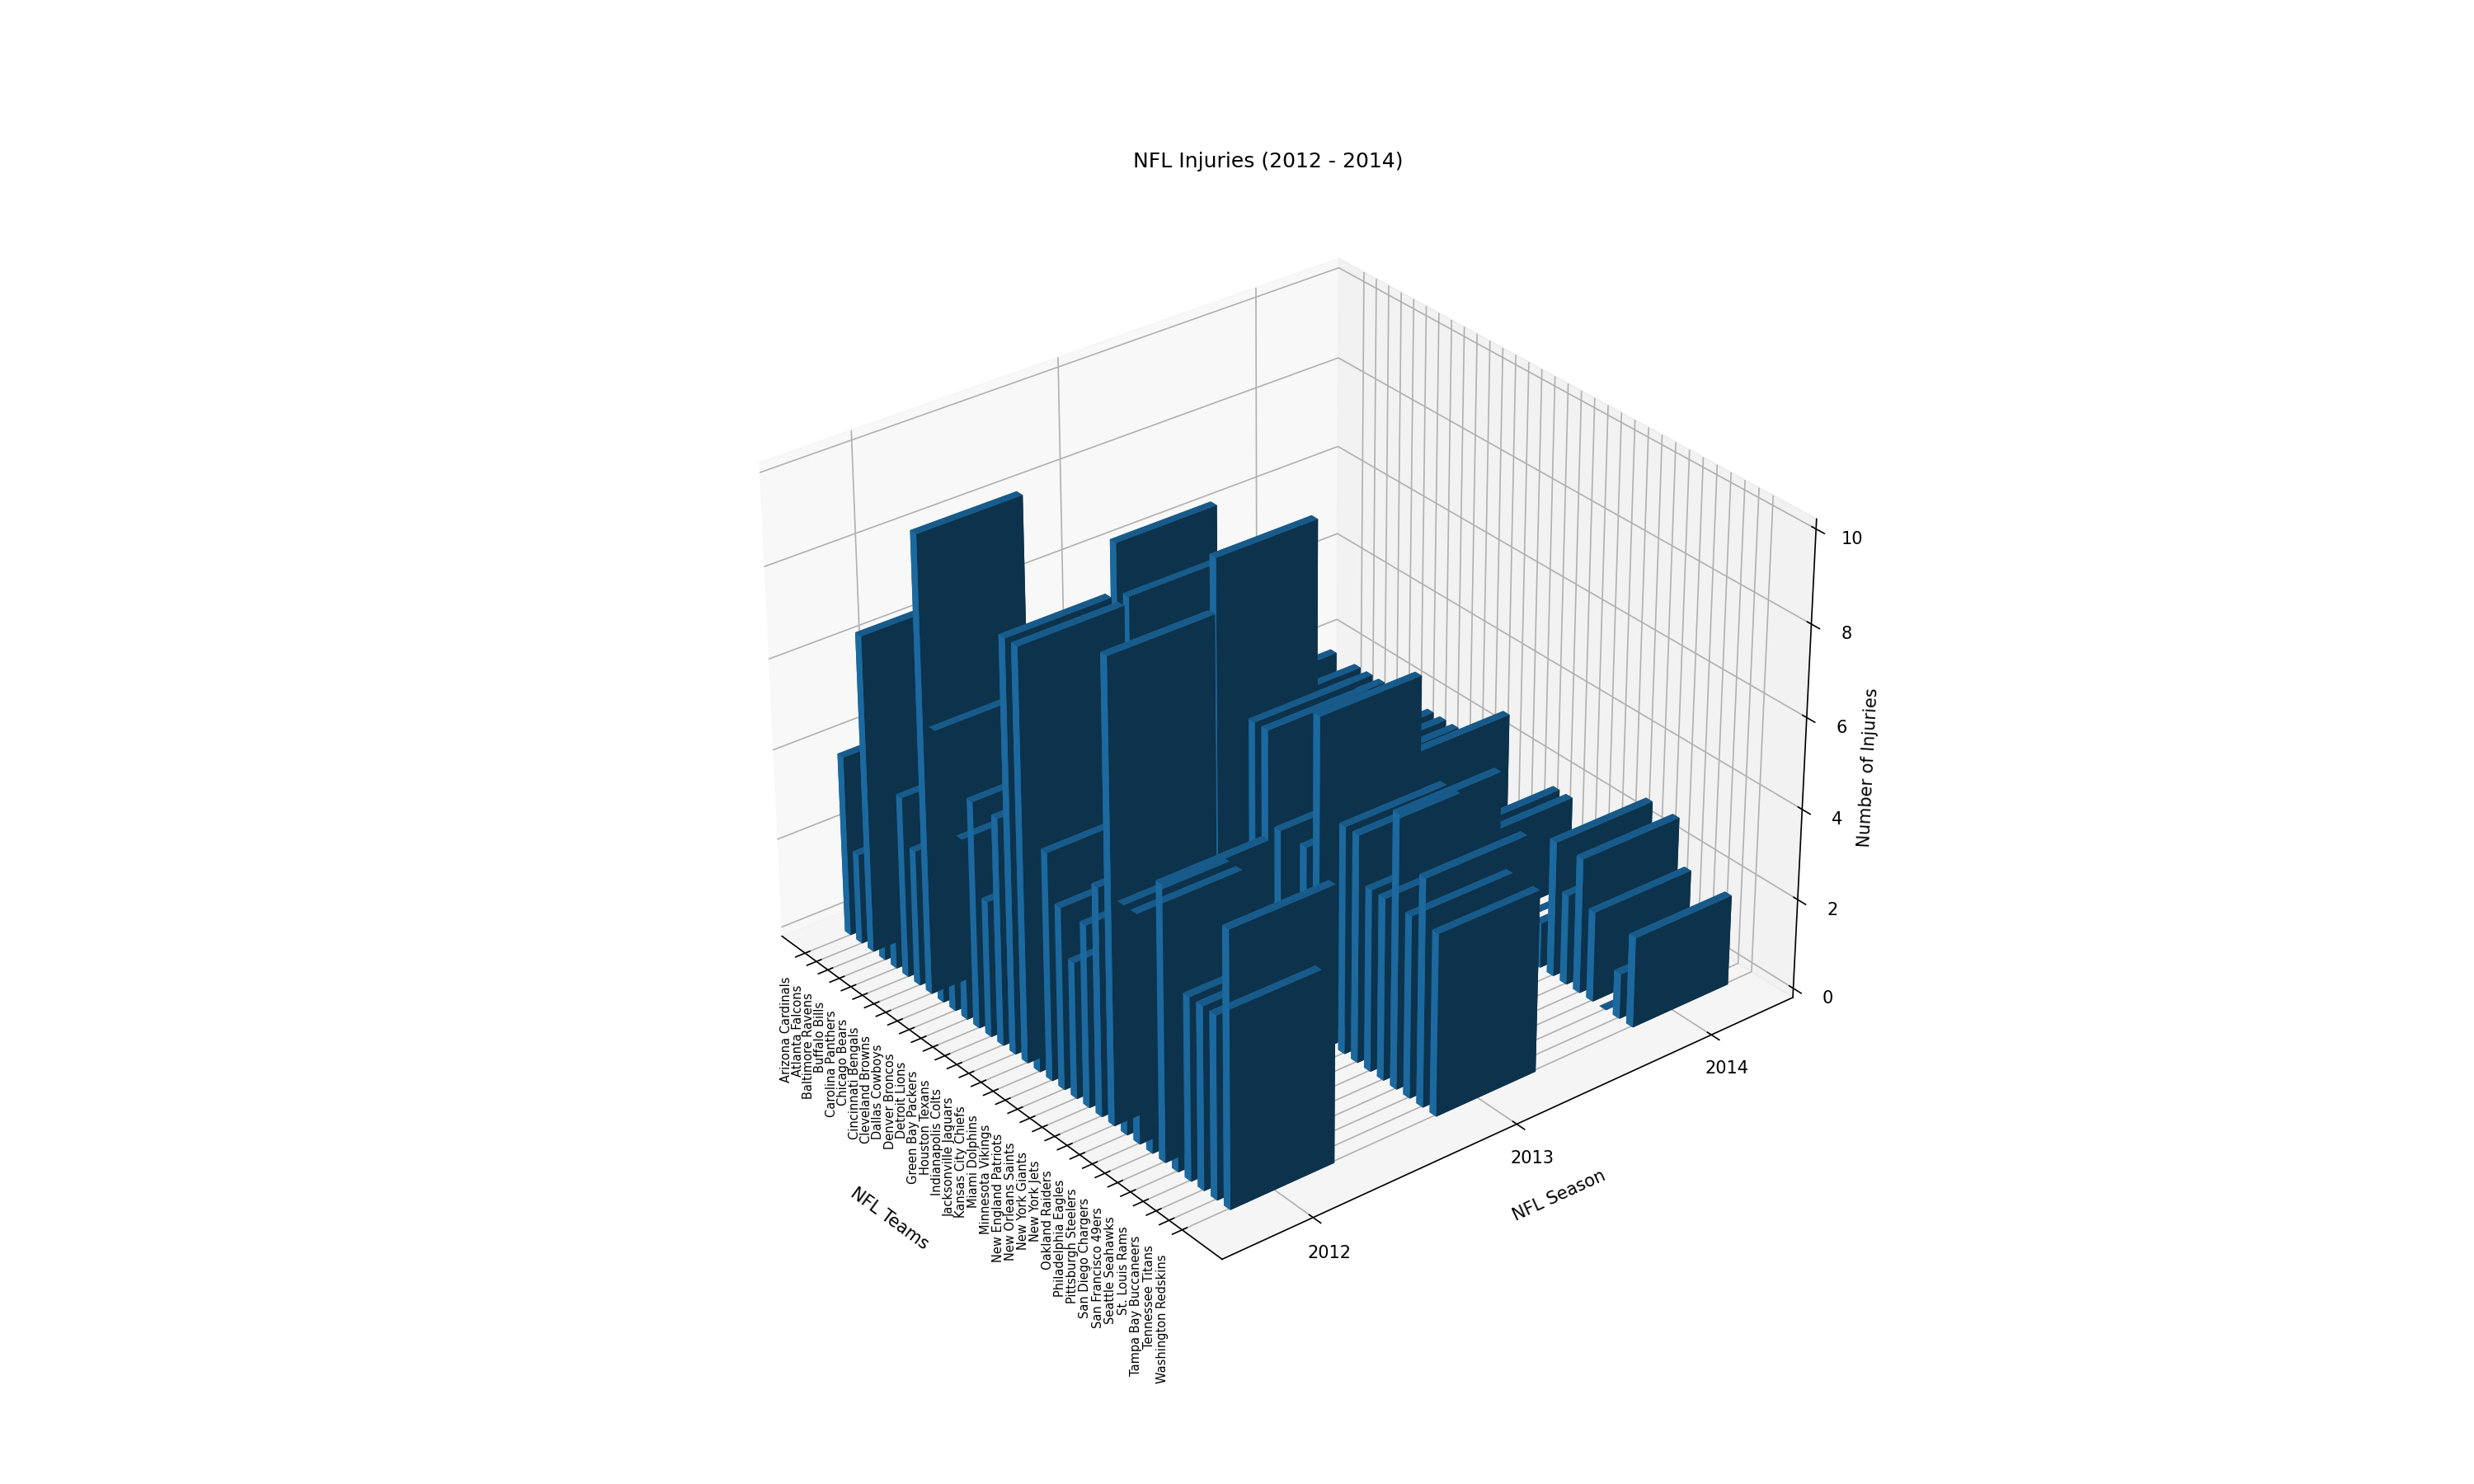

C:\Users\Joel\AppData\Local\Temp\ipykernel_22872\100144177.py:35: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_yaxis.set_ticklabels(crosstab_df.columns)
C:\Users\Joel\AppData\Local\Temp\ipykernel_22872\100144177.py:36: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.set_ticklabels(crosstab_df.index,size=7,rotation=90)


In [46]:
%matplotlib notebook
# Create the 3D bar graph
# thickness of the bars
dx = 0.5
dy = 0.5

# prepare 3d axes
plt.figure(figsize=(20,12))
ax = plt.axes(projection="3d")

# set up positions for the bars 
xpos=np.arange(crosstab_df.shape[0])
ypos=np.arange(crosstab_df.shape[1])

# set the ticks in the middle of the bars
ax.set_xticks(xpos + dx/2)
ax.set_yticks(ypos + dy/2)

# create meshgrid 
xpos, ypos = np.meshgrid(xpos+0.5, ypos)
xpos = xpos.flatten()
ypos = ypos.flatten()

# the bars starts from 0 attitude
zpos=np.zeros(crosstab_df.shape).flatten()

# the bars height
# dz = crosstab_df.values.ravel()
dz = list(crosstab_df[2012]) + list(crosstab_df[2013]) + list(crosstab_df[2014])

# plot 
ax.bar3d(xpos,ypos,zpos,dx,dy,dz,shade=True)

# put the column / index labels
ax.w_yaxis.set_ticklabels(crosstab_df.columns)
ax.w_xaxis.set_ticklabels(crosstab_df.index,size=7,rotation=90)

# name the axes
ax.set_xlabel("NFL Teams", labelpad=40)
ax.set_ylabel("NFL Season", labelpad=10)
ax.set_zlabel("Number of Injuries", labelpad=0.1)
ax.set_title("NFL Injuries (2012 - 2014)")

# Save the plot
plt.savefig("Images/3D_graph.png", bbox_inches="tight")

# Show the plot
plt.show()